# Proyek Tugas Akhir

## Muhamad Renaldi Apriansyah

# Perbandingan Model ARIMA SARIMA dan SARIMAX Dalam Prediksi Suhu Permukaan di DKI Jakarta

## Bisnis Understanding

### Deskripsi Masalah:
    
Dampak pemanasan global terhadap sektor kelautan yaitu pemutihan karang, kenaikan permukaan air laut sehingga membuat berubahnya garis pantai, dan perubahan cuaca yang ekstrim di laut lepas yang berpengaruh terhadap penangkapan ikan oleh nelayan. Di sisi lain, perkembangan dan kemajuan teknologi menghasilkan data yang besar sehingga bisa dianalisis atau diolah peneliti. Data perubahan suhu di DKI Jakarta yang memiliki tren naik digunakan untuk prediksi perubahan suhu dan pemanasan global yang terjadi di DKI Jakarta. Dengan rumusan masalah sebagai berikut:
1.	Bagaimana nilai MSE dan RMSE model ARIMA, SARIMA, SARIMAX dalam prediksi suhu permukaan di DKI Jakarta?
2.	Bagaimana hasil perbandingan model ARIMA, SARIMA, dan SARIMAX dalam prediksi suhu permukaan di DKI Jakarta?

### Solusi yang ditawarkan:

Solusi yang ditawarkan yaitu:
1.	Peneliti mengetahui nilai MSE dan RMSE model ARIMA, SARIMA, dan SARIMAX dalam prediksi data suhu permukaan di DKI Jakarta.
2.	Peneliti mengetahui perbandingan model ARIMA, SARIMA, dan SARIMAX dalam prediksi suhu permukaan di DKI Jakarta.

### Kebutuhan Proyek

Adapun alat analisis yang digunakan pada penelitian ini yaitu menggunakan bahasa pemrograman Python dan menggunakan aplikasi Jupyter Notebook (anaconda3). Model yang digunakan untuk analisis data yaitu dengan model forecasting yaitu ARIMA, SARIMA, dan SARIMAX. 
   

In [1]:
# Library

import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.arima_model import ARMAResults,ARIMAResults
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
from statsmodels.tsa.stattools import adfuller


from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
from dateutil.parser import parse
from scipy import stats
from scipy.stats import normaltest
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima

## Data Understanding

Jelaskan data-data yang diperlukan dalam proyek ini dan bagaimana cara mendapatkannya (edit disini).


In [2]:
# Data
df = pd.read_csv('GlobalLandTemperaturesByCity.csv')
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


## Data Preparation

Jelaskan persiapan yang akan dilakukan dalam data preparation (edit disini).

In [3]:
# Baca dan mentransform data
cities = pd.read_csv('GlobalLandTemperaturesByCity.csv')
jakarta = cities.loc[cities['City'] == 'Jakarta', ['dt','AverageTemperature']]
jakarta.columns = ['Date','Temp']
jakarta['Date'] = pd.to_datetime(jakarta['Date'])
jakarta.reset_index(drop=True, inplace=True)
jakarta.set_index('Date', inplace=True)

# Menampilkan data
jakarta = jakarta.loc['1900':'2013-01-01']
jakarta = jakarta.asfreq('M', method='bfill')
jakarta.head(10)




,Temp
Date,
1900-01-31,26.477
1900-02-28,26.794
1900-03-31,26.753
1900-04-30,26.900
1900-05-31,26.743
1900-06-30,25.993
1900-07-31,25.978
1900-08-31,26.157
1900-09-30,26.254


In [4]:
# Menghapus missing value
jakarta.dropna(inplace=True)
jakarta.index= pd.to_datetime(jakarta.index)
jakarta.index

DatetimeIndex(['1900-01-31', '1900-02-28', '1900-03-31', '1900-04-30',
               '1900-05-31', '1900-06-30', '1900-07-31', '1900-08-31',
               '1900-09-30', '1900-10-31',
               ...
               '2012-03-31', '2012-04-30', '2012-05-31', '2012-06-30',
               '2012-07-31', '2012-08-31', '2012-09-30', '2012-10-31',
               '2012-11-30', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=1356, freq='M')

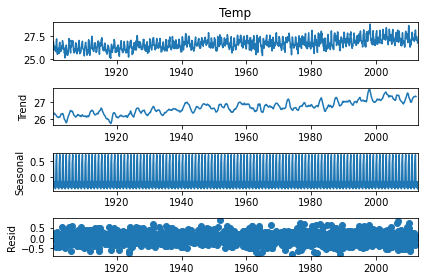

In [5]:
ssn= seasonal_decompose(jakarta["Temp"], model="add")
ssn.plot();

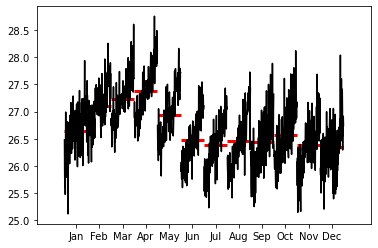

In [6]:
# Eksplorasi musiman dengan plot bulanan
month_plot(jakarta['Temp']);

In [7]:
# Pembagian data latih dan data uji
train= jakarta.iloc[:len(jakarta)-60]
test= jakarta.iloc[len(jakarta)-60:]
print(len(train))
print(len(test))

1296
60


## Modeling, Pengujian Model, Visualisasi Model, dan Evaluasi Model



# Model ARIMA

In [8]:
# Modeling
auto_arima_results= auto_arima(train["Temp"], 
           start_p=0,
           start_q=0,
           max_p=3,
           max_q=3, # maximum p and q
           m=1,              # frequency of series
           d=None,           # let model determine 'd'
           seasonal=False,   # No Seasonality
           start_P=0, 
           D=0,  
           trace=True,
           error_action='ignore',  
           suppress_warnings=True, 
           stepwise=True)

auto_arima_results.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1269.651, Time=0.70 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1271.650, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1271.649, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1267.653, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1273.650, Time=0.64 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.913 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1296
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -632.827
Date:                Thu, 19 Jan 2023   AIC                           1267.653
Time:                        14:23:53   BIC                           1272.819
Sample:                    01-31-1900   HQIC                          1269.592
                         - 12-31-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1556      0.006     24.573      0.000       0.143       0.168
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.14
Prob(Q):                              0.97   Prob(JB):                         0.57
Heteroskedasticity (H):               1.56   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Root Mean Square is 0.520280549319307 

Mean Square Error is 0.27069184999999985


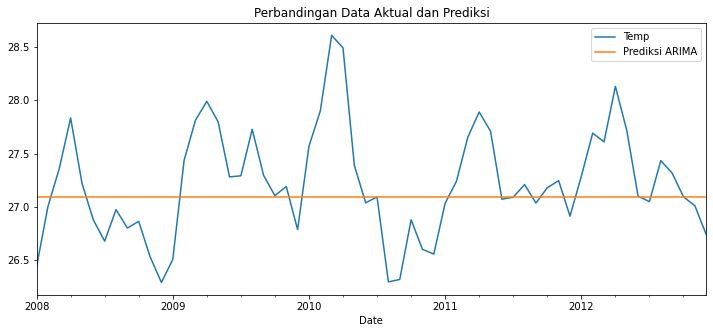

In [9]:
#Pengujian Model
arima_model=ARIMA(train["Temp"], order= (0,1,0))
arima_model_fit= arima_model.fit()

start= len(train)
end= len(train) + len(test) -1

pred= arima_model_fit.predict(start=start, end=end, dynamic=False, typ="levels").rename("Prediksi ARIMA")

#Visualisasi Model
title= "Perbandingan Data Aktual dan Prediksi"
test["Temp"].plot(figsize=(12,5), title= title, legend=True);
pred.plot(legend=True)

# Evaluasi Model
mse= mean_squared_error(test["Temp"],pred)
rmse_arima= rmse(test["Temp"], pred)

print(f"Root Mean Square is {rmse_arima} \n")
print(f"Mean Square Error is {mse}")


# Model SARIMA


In [10]:
# Modeling
smodel = auto_arima(train["Temp"],
                    start_p=0,
                    start_q=0,
                    max_p=3,
                    max_q=3, 
                    m=12,
                    start_P=0,
                    seasonal=True,
                    d=None,
                    D=None,
                    trace=True,
                    error_action='ignore',  
                    suppress_warnings=True, 
                    stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1087.875, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1269.651, Time=0.62 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=902.042, Time=1.98 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1070.848, Time=1.85 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1267.653, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1271.650, Time=0.37 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=716.578, Time=8.51 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=24.14 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=9.25 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=848.837, Time=7.23 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=689.318, Time=12.66 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=886.805, Time=3.28 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=30.47 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=9.56 sec
 ARIMA(3,1,0)(2,0,0)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1296
Model:             SARIMAX(3, 1, 0)x(2, 0, 0, 12)   Log Likelihood                -329.671
Date:                            Thu, 19 Jan 2023   AIC                            671.341
Time:                                    14:29:21   BIC                            702.339
Sample:                                01-31-1900   HQIC                           682.974
                                     - 12-31-2007                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4070      0.027    -14.825      0.000      -0.461      -0.353
ar.L2         -0.1979      0.030     -6.671      0.000      -0.256      -0.140
ar.L3         -0.1176      0.028     -4.259      0.000      -0.172      -0.063
ar.S.L12       0.3633      0.025     14.816      0.000       0.315       0.411
ar.S.L24       0.3904      0.026     14.789      0.000       0.339       0.442
sigma2         0.0967      0.004     27.631      0.000       0.090       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 9.11
Prob(Q):                              0.63   Prob(JB):                         0.01
Heteroskedasticity (H):               1.37   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Root Mean Square is 0.4922128582208039 

Mean Square Error is 0.2422734977978932


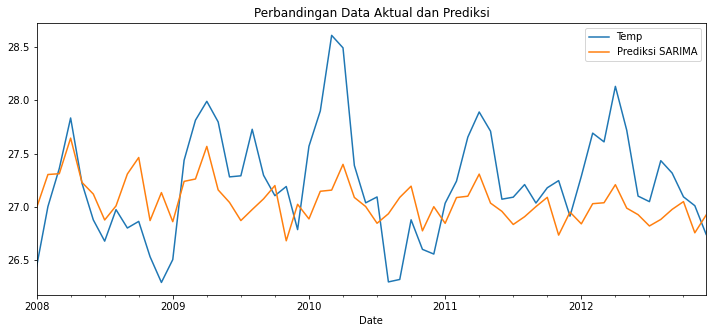

In [11]:
# Pengujian Model
sarima_model= SARIMAX(train["Temp"], order= (3,1,0), seasonal_order= (2,0,0,12))
sarima_model_fit= sarima_model.fit()

start= len(train)
end= len(train) + len(test)-1
pred= sarima_model_fit.predict(start=start, end=end, dynamic=False, typ="levels").rename("Prediksi SARIMA")

# Visualisasi Model
title= "Perbandingan Data Aktual dan Prediksi"
test["Temp"].plot(figsize=(12,5), title= title, legend=True)
pred.plot(legend=True)


# Evaluasi Model
mse= mean_squared_error(test["Temp"],pred)
rmse_sarima= rmse(test["Temp"], pred)

print(f"Root Mean Square is {rmse_sarima} \n")
print(f"Mean Square Error is {mse}")

# Model SARIMAX


In [12]:
# Modeling
result_mul = seasonal_decompose(train['Temp'],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge data latih
train['month'] = train.index.month
train2 = pd.merge(train, seasonal_index, how='left', on='month')
train2.index = train.index  # reassign the index


# merge data tes
test['month'] = test.index.month
test2 = pd.merge(test, seasonal_index, how='left', on='month')
test2.index = test.index  # reassign the index

<ipython-input-12-8d3f82d0b14d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month'] = train.index.month
<ipython-input-12-8d3f82d0b14d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['month'] = test.index.month


In [13]:
# Modeling
sxmodel = auto_arima(train2["Temp"],
                     exogenous=train2[['seasonal']],
                    start_p=0,
                    start_q=0,
                    max_p=3,
                    max_q=3, 
                    m=12,
                    start_P=0,
                    seasonal=True,
                    d=None,
                    D=None,
                    trace=True,
                    error_action='ignore',  
                    suppress_warnings=True, 
                    stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1087.875, Time=1.27 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1269.651, Time=1.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=902.042, Time=2.02 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1070.848, Time=1.79 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1267.653, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1271.650, Time=0.41 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=716.578, Time=9.49 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=22.86 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=7.86 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=848.837, Time=9.45 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=689.318, Time=13.43 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=886.805, Time=2.76 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=30.39 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=12.71 sec
 ARIMA(3,1,0)(2,0,0)[12] intercept   : A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1296
Model:             SARIMAX(3, 1, 0)x(2, 0, 0, 12)   Log Likelihood                -329.671
Date:                            Thu, 19 Jan 2023   AIC                            671.341
Time:                                    14:34:10   BIC                            702.339
Sample:                                01-31-1900   HQIC                           682.974
                                     - 12-31-2007                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4070      0.027    -14.825      0.000      -0.461      -0.353
ar.L2         -0.1979      0.030     -6.671      0.000      -0.256      -0.140
ar.L3         -0.1176      0.028     -4.259      0.000      -0.172      -0.063
ar.S.L12       0.3633      0.025     14.816      0.000       0.315       0.411
ar.S.L24       0.3904      0.026     14.789      0.000       0.339       0.442
sigma2         0.0967      0.004     27.631      0.000       0.090       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 9.11
Prob(Q):                              0.63   Prob(JB):                         0.01
Heteroskedasticity (H):               1.37   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Root Mean Square is 0.34266000517321565 

Mean Square Error is 0.11741587914530818


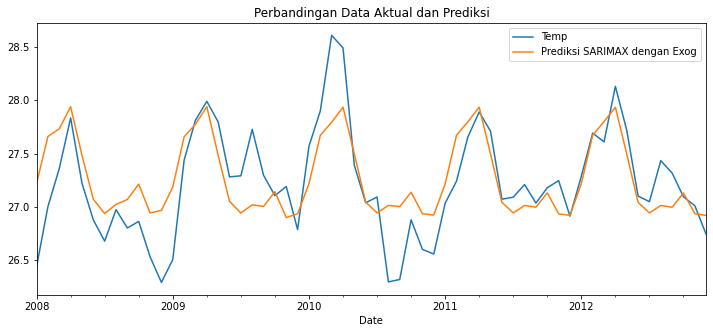

In [14]:
# Pengujian Model
sarimax_model= SARIMAX(train2["Temp"], order= (3,1,0), seasonal_order= (2,0,0,12),exog=train2[['seasonal']])
sarimax_model_fit= sarimax_model.fit()

start= len(train)
end= len(train) + len(test) -1
pred= sarimax_model_fit.predict(start=start, end=end, dynamic=False, typ="levels",exog=test2[['seasonal']]).rename("Prediksi SARIMAX dengan Exog")

# Visualisasi Model
title= "Perbandingan Data Aktual dan Prediksi"
test["Temp"].plot(figsize=(12,5), title= title, legend=True)
pred.plot(legend=True)

# Evaluasi Model
mse= mean_squared_error(test["Temp"],pred)
rmse_sarimax= rmse(test["Temp"], pred)

print(f"Root Mean Square is {rmse_sarimax} \n")
print(f"Mean Square Error is {mse}")